In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

import os
import typing

style.use("fivethirtyeight")

In [2]:
data = pd.read_csv('./vitality.csv')

In [3]:
data

,жизне,конфр,дистанцир,самокон,соц под,пр ответ,избеган,планир,переоц
0,98,69,48,46,69,42,58,56,50
1,61,61,69,38,62,34,62,45,50
2,77,71,48,38,37,43,66,50,42
3,54,64,67,35,40,45,69,46,59
4,66,59,75,74,62,38,70,33,35
5,90,70,39,33,70,66,59,40,33
6,67,49,50,51,75,50,72,43,48
7,108,67,58,55,65,47,55,69,66
8,68,40,70,41,35,39,53,40,52
9,49,69,62,39,40,35,61,30,45


In [7]:
from sklearn.linear_model import LinearRegression

coping_strats = ['конфр','дистанцир', 'самокон', 'соц под', 'пр ответ', 'избеган', 'планир', 'переоц']
model = LinearRegression().fit(data[coping_strats], data['жизне'])

In [12]:
list(reversed(sorted(zip(map(float, model.coef_), coping_strats))))


[(0.427796261858025, 'конфр'),
 (0.3288658236771427, 'планир'),
 (0.3130164109650604, 'соц под'),
 (0.3116766149205959, 'переоц'),
 (0.0849005668709486, 'самокон'),
 (-0.062085421522549034, 'пр ответ'),
 (-0.6660078338571056, 'дистанцир'),
 (-0.6975436489329487, 'избеган')]

<Axes: xlabel='конфр', ylabel='жизне'>

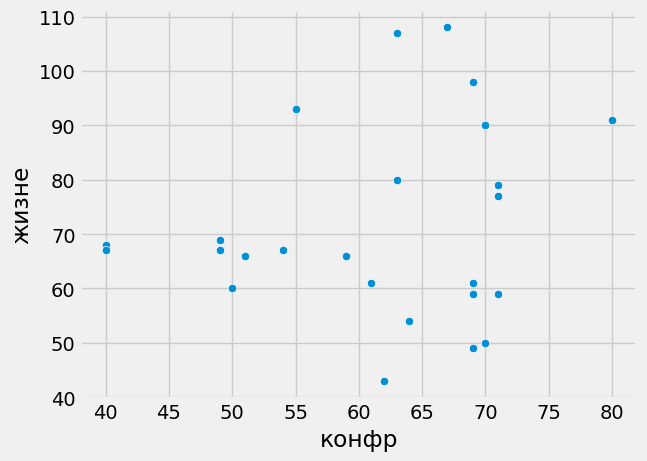

In [13]:
sns.scatterplot(x=data['конфр'], y=data['жизне'])

In [17]:
from dataclasses import dataclass, asdict

@dataclass
class Stat:
    coping: str
    spearman: float
    pvalue: float

results = []
for coping in coping_strats:
    res = stats.spearmanr(data['жизне'], data[coping])
    results.append(Stat(coping=coping, spearman=res.statistic, pvalue=res.pvalue))

In [20]:
results = sorted(results, key=lambda s: s.spearman)

In [21]:
result_df = pd.DataFrame(map(asdict, results))

In [22]:
result_df

,coping,spearman,pvalue
0,дистанцир,-0.460722,0.020462
1,избеган,-0.256569,0.215708
2,пр ответ,-0.012741,0.951799
3,конфр,0.040966,0.845842
4,соц под,0.149537,0.475579
5,переоц,0.265664,0.199307
6,планир,0.331982,0.104955
7,самокон,0.333398,0.103391


In [23]:
result_df.to_csv('spearman.csv')

In [25]:
reg_df = pd.DataFrame(list(reversed(sorted(zip(map(float, model.coef_), coping_strats)))), columns=['Коэф регрессии', 'Коупинг'])
reg_df 

,Коэф регрессии,Коупинг
0,0.427796,конфр
1,0.328866,планир
2,0.313016,соц под
3,0.311677,переоц
4,0.084901,самокон
5,-0.062085,пр ответ
6,-0.666008,дистанцир
7,-0.697544,избеган


In [26]:
reg_df.to_csv("reg.csv")

In [30]:
real_idx = [2, 3, 9, 15, 20, 22]

In [28]:
data

,жизне,конфр,дистанцир,самокон,соц под,пр ответ,избеган,планир,переоц
0,98,69,48,46,69,42,58,56,50
1,61,61,69,38,62,34,62,45,50
2,77,71,48,38,37,43,66,50,42
3,54,64,67,35,40,45,69,46,59
4,66,59,75,74,62,38,70,33,35
5,90,70,39,33,70,66,59,40,33
6,67,49,50,51,75,50,72,43,48
7,108,67,58,55,65,47,55,69,66
8,68,40,70,41,35,39,53,40,52
9,49,69,62,39,40,35,61,30,45


In [31]:
data.iloc[real_idx]

,жизне,конфр,дистанцир,самокон,соц под,пр ответ,избеган,планир,переоц
2,77,71,48,38,37,43,66,50,42
3,54,64,67,35,40,45,69,46,59
9,49,69,62,39,40,35,61,30,45
15,61,69,75,29,74,55,74,51,40
20,79,71,75,72,62,60,74,66,64
22,66,51,70,60,80,52,79,51,57


In [32]:
real_data = data.iloc[real_idx]

In [34]:
results = []
for coping in coping_strats:
    res = stats.spearmanr(real_data['жизне'], real_data[coping])
    results.append(Stat(coping=coping, spearman=res.statistic, pvalue=res.pvalue))

In [35]:
results

[Stat(coping='конфр', spearman=np.float64(0.5296408977028497), pvalue=np.float64(0.2798259481884628)),
 Stat(coping='дистанцир', spearman=np.float64(0.2898855178262242), pvalue=np.float64(0.5773517870348748)),
 Stat(coping='самокон', spearman=np.float64(0.48571428571428577), pvalue=np.float64(0.3287230320699709)),
 Stat(coping='соц под', spearman=np.float64(0.11595420713048969), pvalue=np.float64(0.826848213385815)),
 Stat(coping='пр ответ', spearman=np.float64(0.6), pvalue=np.float64(0.20799999999999982)),
 Stat(coping='избеган', spearman=np.float64(0.46381682852195877), pvalue=np.float64(0.3541642984362303)),
 Stat(coping='планир', spearman=np.float64(0.8116794499134279), pvalue=np.float64(0.04985758510134035)),
 Stat(coping='переоц', spearman=np.float64(0.2571428571428572), pvalue=np.float64(0.6227871720116618))]